In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
platypus_tr = []
for file_path in glob.glob('archive (5)/train/platypus/*'):
    image = cv2.imread(file_path)
    platypus_tr.append(image)

perry_tr = []
for file_path in glob.glob('archive (5)/train/perry/*'):
    image = cv2.imread(file_path)
    perry_tr.append(image)


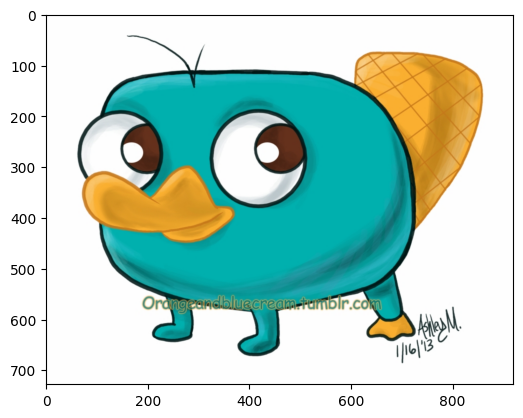

In [4]:
plt.imshow(cv2.cvtColor(platypus_tr[6],cv2.COLOR_BGR2RGB))

In [5]:
perry_labeled = [(image, 'perry') for image in perry_tr]
platypus_labeled = [(image, 'platypus') for image in platypus_tr]

In [6]:
combined_data = perry_labeled + platypus_labeled

In [7]:
combined_data

[(array([[[188, 195, 188],
          [184, 191, 184],
          [177, 184, 177],
          ...,
          [ 65, 139,  79],
          [ 64, 139,  77],
          [ 62, 137,  75]],
  
         [[213, 221, 214],
          [213, 221, 214],
          [214, 222, 215],
          ...,
          [ 78, 149,  93],
          [ 77, 148,  92],
          [ 77, 148,  91]],
  
         [[198, 211, 203],
          [199, 212, 204],
          [200, 213, 205],
          ...,
          [ 74, 139,  93],
          [ 75, 139,  93],
          [ 75, 139,  93]],
  
         ...,
  
         [[102,  96,  85],
          [102,  96,  85],
          [102,  96,  85],
          ...,
          [ 99,  93,  82],
          [ 99,  93,  82],
          [ 99,  93,  82]],
  
         [[102,  96,  85],
          [102,  96,  85],
          [102,  96,  85],
          ...,
          [ 99,  93,  82],
          [ 99,  93,  82],
          [ 99,  93,  82]],
  
         [[102,  96,  85],
          [102,  96,  85],
          [102,  96,  85

In [27]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

RESIZE_WIDTH = 100 
RESIZE_HEIGHT = 100 

resized_images = []
labels = []

for image, label in combined_data:
    resized_image = cv2.resize(image, (RESIZE_WIDTH, RESIZE_HEIGHT))
    normalized_image = resized_image.astype(np.float32) / 255.0
    resized_images.append(normalized_image)
    labels.append(label)

X = np.array(resized_images)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
y_train

array(['perry', 'perry', 'perry', 'platypus', 'platypus', 'perry',
       'perry', 'platypus', 'perry', 'perry', 'perry', 'platypus',
       'platypus', 'platypus', 'perry', 'platypus', 'platypus', 'perry',
       'perry', 'platypus', 'perry', 'platypus', 'perry', 'perry',
       'platypus', 'perry', 'platypus', 'perry', 'perry', 'perry',
       'platypus', 'perry', 'perry', 'platypus', 'perry', 'platypus',
       'platypus'], dtype='<U8')

In [29]:
for i in range(len(y_train)):
    if y_train[i]=='perry':
        y_train[i]=1
    else:
        y_train[i]=0
for i in range(len(y_val)):
    if y_val[i]=='perry':
        y_val[i]=1
    else:
        y_val[i]=0

In [31]:
y_val

array(['0', '0', '0', '0', '1', '0', '1', '1', '1', '0'], dtype='<U8')

In [32]:
import numpy as np


y_train = y_train.astype(np.float32)
y_val=y_val.astype(np.float32)


In [159]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=23, batch_size=32, validation_split=0.2)

model.save('my_cnn_model.h5')


Epoch 1/23
1/1 [==============================] - 2s 2s/step - loss: 0.7079 - accuracy: 0.3793 - val_loss: 1.7484 - val_accuracy: 0.5000
Epoch 2/23
1/1 [==============================] - 0s 229ms/step - loss: 1.4288 - accuracy: 0.5862 - val_loss: 1.2755 - val_accuracy: 0.5000
Epoch 3/23
1/1 [==============================] - 0s 244ms/step - loss: 1.2763 - accuracy: 0.4138 - val_loss: 0.8377 - val_accuracy: 0.5000
Epoch 4/23
1/1 [==============================] - 0s 235ms/step - loss: 0.7746 - accuracy: 0.4138 - val_loss: 0.6677 - val_accuracy: 0.3750
Epoch 5/23
1/1 [==============================] - 0s 217ms/step - loss: 0.5083 - accuracy: 0.7931 - val_loss: 0.8832 - val_accuracy: 0.5000
Epoch 6/23
1/1 [==============================] - 0s 224ms/step - loss: 0.6465 - accuracy: 0.5862 - val_loss: 0.8465 - val_accuracy: 0.5000
Epoch 7/23
1/1 [==============================] - 0s 221ms/step - loss: 0.5870 - accuracy: 0.5862 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 8/23
1/1 [=======

c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [160]:
loss, accuracy = model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 40ms/step - loss: 1.0908 - accuracy: 0.6000


In [162]:
path='archive (5)/train/perry/3.jpg'

In [163]:
imag=cv2.imread(path)

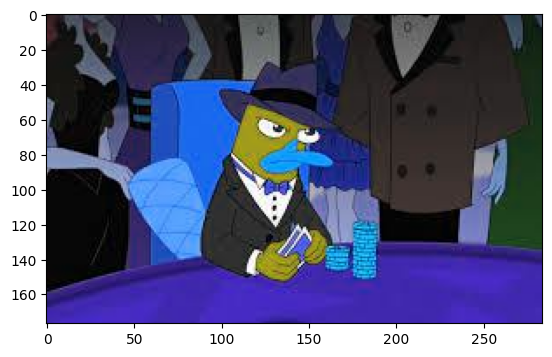

In [164]:
plt.imshow(imag)

In [165]:
imag = cv2.resize(resized_image, (100, 100)) 
imag = imag.astype(np.float32) / 255.0 
imag = np.expand_dims(imag, axis=0)

print(imag.shape)

model.predict(imag)


(1, 100, 100, 3)
1/1 [==============================] - 0s 121ms/step


array([[0.01670037]], dtype=float32)

In [166]:
ans=model.predict(imag)
print(ans)
threshold = 0.5
predicted_label = 1 if ans >= threshold else 0
if predicted_label==1:
    print("perry")
else:
    print('platypus')


1/1 [==============================] - 0s 39ms/step
[[0.01670037]]
platypus
